# **pandas by Bulakorn Laosakul**
### Student ID: 603-08158-21
### 2108564 Geospatial Data Science and Analysis

## Importing Library
1. นำเข้า **pandas** ในโค้ด Python

In [1]:
import pandas as pd

## Downloading Database
2. ดาวน์โหลดฐานข้อมูลจาก GitHub

In [2]:
fromGitHub = pd.read_excel('https://raw.githubusercontent.com/bulakornlsk/2108564-GEOS-DATA-SCI-ANAL/master/Fire_Data.xlsx')

In [3]:
# ตรวจสอบฐานข้อมูลที่ดาวน์โหลดมา
fromGitHub

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


## Selecting and Viewing Database
3. เลือกช่วงข้อมูล 5 วัน (ในที่นี้จะเลือกช่วงข้อมูลในวันที่ 1 ถึง 5 มกราคม ค.ศ. 2020)

In [4]:
dataframe = fromGitHub.loc[(fromGitHub['ACQ_DATE']=='2020-01-01')|(fromGitHub['ACQ_DATE']=='2020-01-02')|(fromGitHub['ACQ_DATE']=='2020-01-03')|(fromGitHub['ACQ_DATE']=='2020-01-04')|(fromGitHub['ACQ_DATE']=='2020-01-05')]

In [5]:
# ตรวจสอบฐานข้อมูลหลังจากการเลือกข้อมูล
dataframe

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
3530,3531,16.48039,98.68256,332.0,0.49,0.40,2020-01-01,654,N,VIIRS,n,1,300.4,3.3,0
3531,3532,16.54585,98.63685,347.0,0.48,0.40,2020-01-01,654,N,VIIRS,n,1,301.4,10.4,0
3532,3533,16.80097,99.28997,348.8,0.53,0.42,2020-01-01,654,N,VIIRS,n,1,301.6,11.9,0
3533,3534,16.73725,98.63077,335.7,0.49,0.40,2020-01-01,654,N,VIIRS,n,1,297.8,5.3,0
3534,3535,16.83298,99.26535,337.1,0.53,0.42,2020-01-01,654,N,VIIRS,n,1,300.1,4.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,4068,18.57860,98.08656,297.4,0.50,0.66,2020-01-05,1950,N,VIIRS,n,1,286.4,0.9,0
4068,4069,17.35966,99.37133,299.5,0.63,0.72,2020-01-05,1950,N,VIIRS,n,1,288.5,1.1,0
4069,4070,16.84638,99.17039,304.3,0.63,0.72,2020-01-05,1950,N,VIIRS,n,1,289.2,1.7,0
4070,4071,16.84890,99.17075,302.3,0.63,0.72,2020-01-05,1950,N,VIIRS,n,1,288.3,1.6,0


4. เก็บข้อมูลละติจูดและลองจิจูดของแต่ละค่าลงในเวกเตอร์ **latitude** และ **longitude** ตามลำดับ

In [6]:
latitude = dataframe['LATITUDE']
longitude = dataframe['LONGITUDE']

## Editing Database
5. สร้างคอลัมน์ใหม่ **DATETIME** โดยนำข้อมูลจากคอลัมน์ **ACQ_DATE** และ **ACQ_TIME** มาประกอบเข้าด้วยกัน

In [7]:
dataframe['DATETIME'] = pd.to_datetime(dataframe['ACQ_DATE'].astype(str)+dataframe['ACQ_TIME'].map(str),format = '%Y-%m-%d%H%M')
timeframe = dataframe['DATETIME']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
# ตรวจสอบฐานข้อมูลหลังจากการสร้างคอลัมน์
dataframe

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DATETIME
3530,3531,16.48039,98.68256,332.0,0.49,0.40,2020-01-01,654,N,VIIRS,n,1,300.4,3.3,0,2020-01-01 06:54:00
3531,3532,16.54585,98.63685,347.0,0.48,0.40,2020-01-01,654,N,VIIRS,n,1,301.4,10.4,0,2020-01-01 06:54:00
3532,3533,16.80097,99.28997,348.8,0.53,0.42,2020-01-01,654,N,VIIRS,n,1,301.6,11.9,0,2020-01-01 06:54:00
3533,3534,16.73725,98.63077,335.7,0.49,0.40,2020-01-01,654,N,VIIRS,n,1,297.8,5.3,0,2020-01-01 06:54:00
3534,3535,16.83298,99.26535,337.1,0.53,0.42,2020-01-01,654,N,VIIRS,n,1,300.1,4.2,0,2020-01-01 06:54:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,4068,18.57860,98.08656,297.4,0.50,0.66,2020-01-05,1950,N,VIIRS,n,1,286.4,0.9,0,2020-01-05 19:50:00
4068,4069,17.35966,99.37133,299.5,0.63,0.72,2020-01-05,1950,N,VIIRS,n,1,288.5,1.1,0,2020-01-05 19:50:00
4069,4070,16.84638,99.17039,304.3,0.63,0.72,2020-01-05,1950,N,VIIRS,n,1,289.2,1.7,0,2020-01-05 19:50:00
4070,4071,16.84890,99.17075,302.3,0.63,0.72,2020-01-05,1950,N,VIIRS,n,1,288.3,1.6,0,2020-01-05 19:50:00


6. สร้างคอลัมน์ใหม่ **TIMESTAMP** สำหรับพล็อตสามมิติ โดยการแปลงค่าในคอลัมน์ **DATETIME** จาก datetime64 มาเป็น float64

In [9]:
dataframe['TIMESTAMP'] = dataframe['DATETIME'].astype('datetime64').astype(int).astype(float)
timestamp = dataframe['TIMESTAMP']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Plotting 3D Scatter Plot
7. นำเข้า **matplotlib** ในโค้ด Python

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

8. สร้างแผนภูมิกระจายแบบสามมิติ โดยให้แกน X เป็นลองจิจูด แกน Y เป็นละติจูด และแกน Z เป็นวันและเวลา

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


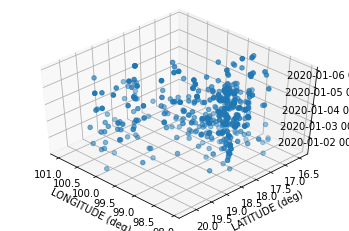

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(longitude,latitude,timestamp)

# สร้าง list เพื่อสร้างขีดบอกระดับในแกน Z ในการแสดงวันและเวลา โดยใช้ข้อมูลในช่วง 5 วันที่เลือกและวันถัดไปอีก 1 วัน วันละ 1 ข้อมูล เพื่อไม่ให้สร้างขีดบอกระดับที่มีค่าเท่ากันซ้ำกันเป็นจำนวนมาก
dataframe2 = fromGitHub.loc[(fromGitHub['OBJECTID']==3531)|(fromGitHub['OBJECTID']==3573)|(fromGitHub['OBJECTID']==3777)|(fromGitHub['OBJECTID']==3932)|(fromGitHub['OBJECTID']==4023)|(fromGitHub['OBJECTID']==4073)]
dataframe2['TIMESTAMP'] = dataframe2['ACQ_DATE'].astype('datetime64').astype('int64').astype('float64')
dates = dataframe2['ACQ_DATE']
dates_float64 = dataframe2['TIMESTAMP']

# สร้างขีดบอกระดับในแกน Z และคำอธิบายค่าในแกน X และ Y
ax.set_zticks(dates_float64)
ax.set_zticklabels(dates)
ax.set_xlabel('LONGITUDE (deg)')
ax.set_ylabel('LATITUDE (deg)')
ax.view_init(elev = 45,azim = 135)
plt.show()